### Project 2

Bieber Fever

By Manu Patil and Katie Barno

# Question: What are the effects of media and boredom on the fans and haters of Justin Bieber? 
Assuming the fans of Bieber are, "infected," and using an SIR, or SBR, model to illustrate this phenomenon, how does  media influence fans? Boredom? What about those who dislike Bieber simply because of his popularity, the so-called haters? We expand the standard SIR model to account for these two "diseases." 

The following cells show our replication of the simulation in the Tweedle-Smith paper. We were able to produce a model that yeilded the same results as the paper. From here, we will expand the model to incorporate anti-fans, sweeps of the boredom rate, and a sweep of media coverage from extreme negative to extreme positive.

In [38]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

   As in the SIR model, S and R in our model represent the suceptible and recovered populations, respectively. B in our model is the infected population, typically represented as I. 
   
   $\epsilon$ : Our other parameters control the flows. Epsilon represents the total media that people consume, it is a proportion of positive and negative media. 
   
   $\pi$ : The 'recruitment rate' here reffers to the rate at which young people enter the system. It is not the rate at which people become fans.
   
   $\mu$ : The 'maturation rate' represents the rate at which people age out of our system. We are modeling individuals between the ages of five and seventeen years old.
   
   $\beta$ : The 'transmission rate' is the rate at which suceptible individuals become fans. 
   
   $b$ : Our 'boredom rate' is the rate of recovery from the bieber disease. This rate is not necesarily due to negative media, fans have just lost interest. 
   
   $P$ : The 'positive media rate' is the amount of positive media Bieber recieves per month.
   
   $N$ : The 'negative media rate' is the amount of negative media Bieber recieves per month.


In [39]:
def make_system(pi, Beta, mu, b ,P, N, epsilon, dt):
    """Make a system object for the SBR model.
    S: Susceptible
    B: Bieber-infected
    R: Recovered
    pi: Recruitment Rate
    Beta: Transmission Rate
    mu: Maturation Rate
    b: Boredom Rate
    P: Positive Media Rate
    N: Negative Media Rate
    epsilon: Positive Media Proportion
    
    returns: System object
    """
    init = State(S = 100, B = 3, R = 0);

    t0 = 0;
    t_end = 10;
    
    return System(init=init, t0=t0, t_end=t_end,
                  pi =pi, 
                  Beta = Beta, 
                  mu = mu,
                  b  = b,
                  P = P,
                  N = N, 
                  epsilon= epsilon,dt=dt);

In [40]:
def update_func_with_media(state, t, system):
    """Update the SBR model.
    
    state: State (S,B,R)
    t: time
    system: System object
    
    returns: State (S,B,R)
    """
    unpack(system)
    S,B,R = state;
    entranceRate = pi # people that enter the system per month
    infectedRate = Beta*S*B # number of people infected each month
    posMediaPercent = epsilon*P
    negMediaPercent = (1-epsilon)*N
    boredom = b*B
    ds = entranceRate - infectedRate - posMediaPercent*S + negMediaPercent*B + posMediaPercent*R - negMediaPercent*S - mu*S
    db = infectedRate + posMediaPercent*S - negMediaPercent*B - boredom - mu*B # paper says R but should be B
    dr = boredom - posMediaPercent*R + negMediaPercent*S - mu*R
    S += ds* dt
    B += db*dt
    R += dr*dt

    return State(S = S, B = B, R = R);

In [41]:
def update_func_without_media(state, t, system):
    """Update the SBR model.
    
    state: State (S,B,R)
    t: time
    system: System object
    
    returns: State (S,B,R)
    """
    unpack(system)
    S,B,R = state;
    entranceRate = pi # people that enter the system per month
    infectedRate = Beta*S*B # number of people infected each month
    posMediaPercent = epsilon*P
    negMediaPercent = (1-epsilon)*N
    boredom = b*B
    ds = entranceRate - infectedRate  - mu*S
    db = infectedRate - boredom - mu*B # paper says R but should be B
    dr = boredom- mu*R
    S += ds* dt
    B += db*dt
    R += dr*dt

    return State(S = S, B = B, R = R);

In [42]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    frame = TimeFrame(columns=init.index)
    frame.row[0] = init
    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

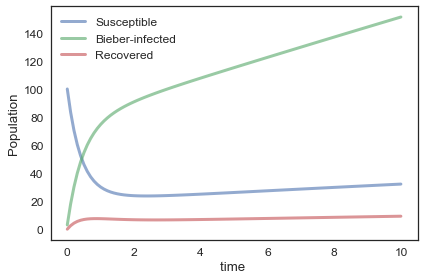

In [43]:
system = make_system(10, .00083, 1/144,1/24 , 2, 1, .75,.1) #Given Parameters and dt set to 1/24 such that time is represented in hours
frame = run_simulation(system, update_func_with_media);
plot(frame.S, label  = "Susceptible");
plot(frame.B, label = "Bieber-infected");
plot(frame.R, label = "Recovered");

decorate(xlabel = "time ", ylabel = "Population");


The above graph displays the model we replicated from the original paper. We produced the same results as the paper for this boredom rate, 1/24. As you can see, this low rate of boredom produces a world where Biebers fame and popularity continuosly grow.

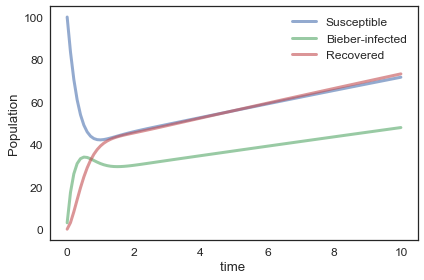

In [44]:
system = make_system(10, .00083, 1/144,2 , 2, 1, .75,.1) #Given Parameters and dt set to 1/24 such that time is represented in hours
frame = run_simulation(system, update_func_with_media);
plot(frame.S, label  = "Susceptible");
plot(frame.B, label = "Bieber-infected");
plot(frame.R, label = "Recovered");

decorate(xlabel = "time ", ylabel = "Population");

This graph shows the same model as the one in the graph above, only here we have increases the boredom from 1/24 to 2. Again, we plotted this graph to show that we have successfully replicated the simulations we saw in the paper. In this version of the model, the high rate of boredom among fans dampens the rate at which idolization of Bieber spreads.

# Change One: Introduction of Haters

Due to his enourmous popularity, Justin Bieber has gathered a number of people who dislike him for no reason other than to rebel against what they percieve to be the mainstream. These "haters" act almost as "infected" as our Bieber fans. The difference is, the hater population is dependant on the fan population. We expand our model from three stocks, S,B, and R; to four, S, B, R, and H. 
## Grammar check here

In [71]:
def make_system_H(pi, Beta, mu, b ,P, N, epsilon, gamma, dt):
    """Make a system object for the SBR model.
    S: Susceptible
    B: Bieber-infected
    R: Recovered
    pi: Recruitment Rate
    Beta: Transmission Rate
    mu: Maturation Rate
    b: Boredom Rate
    P: Positive Media Rate
    N: Negative Media Rate
    epsilon: Positive Media Proportion
    gamma = Hater rate
    
    returns: System object
    """
    init = State(S = 200, B = 200, R = 200, H = 200);

    t0 = 0;
    t_end = 100;
    
    return System(init=init, t0=t0, t_end=t_end,
                  pi =pi, 
                  Beta = Beta, 
                  mu = mu,
                  b  = b,
                  P = P,
                  N = N, 
                  epsilon= epsilon,
                  gamma = gamma, dt=dt);

The function "make_system_H" makes a similar system to the original one. The difference is the parameter gamma, which controls the rate at which the suceptible population become "haters."

In [72]:
def update_func_H(state, t, system):
    """Update the SBR model.
    
    state: State (S,B,R)
    t: time
    system: System object
    
    returns: State (S,B,R)
    """
    unpack(system)
    S,B,R,H = state;
    entranceRate = pi # people that enter the system per month
    infectedRate = Beta*S*B # number of people infected each month
    posMediaPercent = epsilon*P
    negMediaPercent = (1-epsilon)*N
    
    ds = entranceRate - infectedRate - posMediaPercent*S + negMediaPercent*B + posMediaPercent*R - negMediaPercent*S - mu*S -gamma*B
    db = infectedRate + posMediaPercent*S - negMediaPercent*B - b*B - mu*B # paper says R but should be B
    dr = b*B - posMediaPercent*R - mu*R
    dh = negMediaPercent*S + gamma*B - b*H - mu*H
    
    S += ds*dt
    B += db*dt
    R += dr*dt
    H += dh*dt

    return State(S = S, B = B, R = R, H = H);

This new update function included a new differential equation for our hater population. Haters come from suceptible due to negative media coverage relating to Bieber, this rate is represented by the "negMediaPercent\*S"  term, or they become haters because they simply object to Biebers following, "gamma\*B". People leave the hater population when they become bored of their haterdom, "b\*H", or when they age out of our system, "mu\*H".

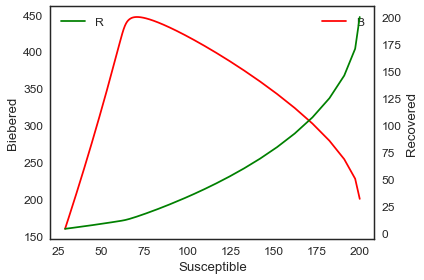

In [73]:
system = make_system_H(10, .00083, 1/144, 1/24 , 2, 1, .75, 0.01, .1) #Given Parameters and dt set to 1/24 such that time is represented in hours
frame = run_simulation(system, update_func_H);

#print(frame)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_yscale('linear')
ax1.plot(frame.S, frame.B, 'r')
ax1.set_ylabel("Biebered")
ax1.set_xlabel("Susceptible")
decorate();

ax2 = ax1.twinx()
# ax2 = ax1.twiny()
ax2.set_yscale(ax1.get_yscale())
ax2.plot(frame.S, frame.R, 'g')
ax2.set_ylabel('Recovered')
decorate();



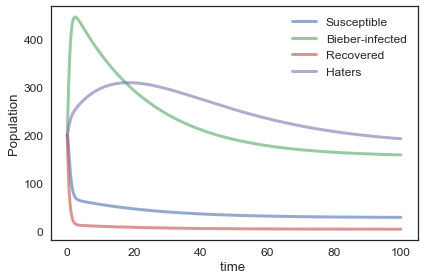

In [74]:
plot(frame.S, label  = "Susceptible");
plot(frame.B, label = "Bieber-infected");
plot(frame.R, label = "Recovered");
plot(frame.H, label = "Haters");
decorate(xlabel = "time ", ylabel = "Population");

This is the first original graph we are presenting. The above graph shows our system with the incorporation of haters. The hater population reacts to the fan population. The intial populations of each stock are all 200, I expect us to change this before we turn it in.

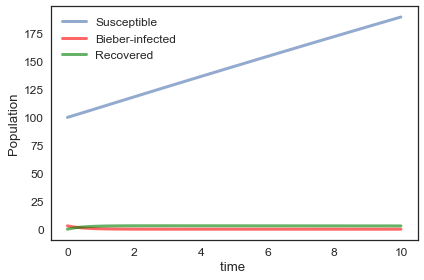

In [75]:
system = make_system(10, .00083, 1/144, 2, 2, 1, .75,.1) #Given Parameters and dt set to 1/24 such that time is represented in hours
frame = run_simulation(system, update_func_without_media);
plot(frame.S, label  = "Susceptible");
plot(frame.B, label = "Bieber-infected",color = "r");
plot(frame.R, label = "Recovered",color= "g");

decorate(xlabel = "time ", ylabel = "Population");

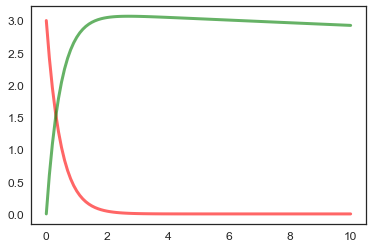

In [50]:
plot(frame.B, label = "Bieber-infected",color = "r");
plot(frame.R, label = "Recovered",color= "g");

## Sweeping Boredom

Below we begin our first parameter sweep. Boredom controls the retention of the fan and hater populations. As boredom is increased, we expect to see both fans and haters leave their respective groups more quickly. 

In [51]:
def sweep_beta(pi, Beta, mu, b_array ,P, N, epsilon, dt):
    """Sweep a range of values for b.
    
    beta_array: array of beta values
    gamma: recovery rate
    
    returns: SweepSeries that maps from beta to total infected
    """
    sweep = SweepSeries()
#     sweep[0] = 3
    for b in b_array:
        system = make_system(pi, Beta, mu, b ,P, N, epsilon, dt)
        frame = run_simulation(system, update_func_with_media) # Figure out what we actually want to measure here. Figure out which metric is best
        sweep[system.b] = frame.B.max()
        
    return sweep

In [52]:
boredom_array = linrange(0,2,.01) 
sweep = sweep_beta(10, .00083, 1/144, boredom_array, 2, 1, .75,1);

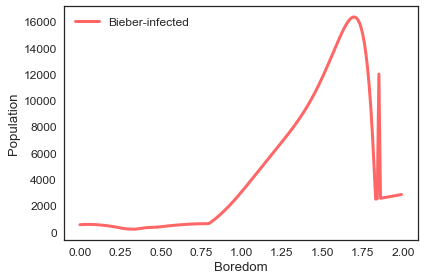

In [53]:
plot(sweep, label = "Bieber-infected",color = "r");
decorate(xlabel = "Boredom", ylabel = "Population");

The above chart shows how our fan population reacts to boredom. Below 0.75, the fan population remains relatively stable at a few hundred people. Above this threshold, the fan populoation rapidly increases until there is a sharp crash just befor 2. 
# Below here I'm showing the effect of boredom on hater pop. 

In [78]:
def sweep_beta_H(pi, Beta, mu, b_array ,P, N, epsilon, dt):
    """Sweep a range of values for b.
    
    beta_array: array of beta values
    gamma: recovery rate
    
    returns: SweepSeries that maps from beta to total infected
    """
    sweep = SweepSeries()
#     sweep[0] = 3
    for b in b_array:
        system = make_system_H(pi, Beta, mu, b ,P, N, epsilon, gamma, dt)
        frame = run_simulation(system, update_func_H) # Figure out what we actually want to measure here. Figure out which metric is best
        sweep[system.b] = frame.H.max()
        
    return sweep

In [79]:
boredom_array = linrange(0,2,.01) 
sweep_H = sweep_beta_H(10, .00083, 1/144, boredom_array, 2, 1, .75, 1);

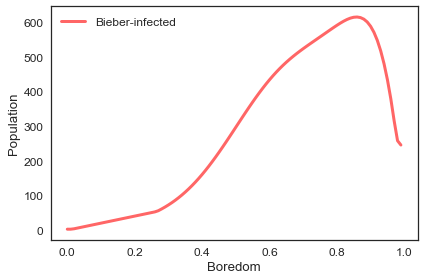

In [80]:
plot(sweep, label = "Bieber-haters",color = "r");
decorate(xlabel = "Boredom", ylabel = "Population");

If the code above makes sense, This graph shows how boredome effects the population of the Haters. I don't belive this graph. 

# Sweeping the Ratio of Positive/Negative Media

In [54]:
def sweep_Media_Ratio(pi, Beta, mu, b ,P, N, e_array, dt):
    """Sweep a range of values for b.
    
    beta_array: array of beta values
    gamma: recovery rate
    
    returns: SweepSeries that maps from beta to total infected
    """
    sweep = SweepSeries()
    for e in e_array:
        system = make_system(pi, Beta, mu, b ,P, N, e, dt)
        frame = run_simulation(system, update_func_with_media) # Figure out what we actually want to measure here. Figure out which metric is best
        sweep[system.epsilon] = frame.B.max();
        
    return sweep

In [55]:
e_array = linrange(0,1,.01);
sweep = sweep_Media_Ratio(10, .00083, 1/144, 1/24, 2, 1, e_array,1);

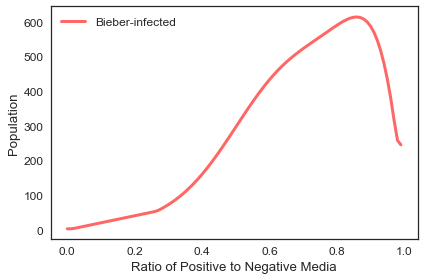

In [56]:
plot(sweep, label = "Bieber-infected",color = "r");
decorate(xlabel = "Ratio of Positive to Negative Media", ylabel = "Population");

This graph, showing the relationship between media and fan population, is what we expected to see. The bottom axis is a ration of posive and negative media. As the media coverage of Bieber becomes more positive, his fans grow in number. There is a point at which more posive media isn't better, when the media coverage is almost entirely positive Beiber does start to lose fans. Alothough there are clearly more Bieber fans at 100% positive coverage that at 100% negative coverage. 

### ODE STUFFS

In [57]:
def slope_func(state, t, system):
    """Slope of the SBR model.
    
    state: State (S,B,R)
    t: time
    system: System object
    
    returns: State (S,B,R)
    """
    unpack(system)
    S,B,R = state;
    entranceRate = pi # people that enter the system per month
    infectedRate = Beta*S*B # number of people infected each month
    posMediaPercent = epsilon*P
    negMediaPercent = (1-epsilon)*P
    boredom = b*B
    ds = entranceRate - infectedRate  - mu*S
    db = infectedRate - boredom - mu*B # paper says R but should be B
    dr = boredom- mu*R
  

    return ds,db,dr;

In [58]:
slope_func(init, 0, system)

(9.056555555555555, -5.771833333333333, 6.0)

In [59]:
system = make_system(10, .00083, 1/144, 1/24, 2, 1, .75,1)
results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,32
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


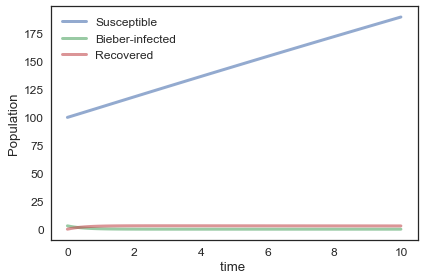

In [60]:
plot(frame.S, label  = "Susceptible");
plot(frame.B, label = "Bieber-infected");
plot(frame.R, label = "Recovered");

decorate(xlabel = "time ", ylabel = "Population");

# Interpretation

We feel our model is acurate for a number of reasons. First off, in the absence of haters and negative media it matches the results from the paper exactly. When haters are added their interactions in the model are plausible. The hater population reacts to the fan population in a realistic way. We also think the sweeps of boredom and media coverage are realistic representations of what would happen. When boredom is swept from 0 to 2, (this actually didn't make sense to me). The third graph, showing how the type of media coverage effects opinions, showed what we expected to see. 

# Abstract

We expanded the SIR model to include four stocks and several new flows. We have suceptible, Bieber-fan, recovered and Bieber-hater populations. They are influenced by each other, the media, and time. Our model shows us that ultimately, given enough time, the levels of fans, haters, suceptible and recovered become constant. 